In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import time

# 1. 지하철 승하차 인원

In [13]:
# 수집데이터 불러오기(지하철 승하차 인원)
# subway_2016_list = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/2차 프로젝트/passenger_data(2016-2020)/Seoul_subway_passenger_data3(2015-2022)/서울교통공사 2016년 일별 역별 시간대별 승하차인원(1_8호선).xlsx')
# subway_2017_list = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/2차 프로젝트/passenger_data(2016-2020)/Seoul_subway_passenger_data3(2015-2022)/서울교통공사 2017년 일별 역별 시간대별 승하차인원(1_8호선).xlsx')
# subway_2018_list = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/2차 프로젝트/passenger_data(2016-2020)/Seoul_subway_passenger_data3(2015-2022)/서울교통공사 2018년 일별 역별 시간대별 승하차인원(1_8호선).xlsx')
# subway_2019_list = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/2차 프로젝트/passenger_data(2016-2020)/Seoul_subway_passenger_data3(2015-2022)/서울교통공사 2019년 일별 역별 시간대별 승하차인원(1_8호선).xlsx')
subway_2020_list = pd.read_csv('E:/Git/data/새 폴더/passenger_data(2016-2020)/서울교통공사 2020년 일별 역별 시간대별 승하차인원(1_8호선).csv', encoding = 'cp949')

# 깃허브 README에서 지하철 승하차인원 데이터 공유 주소 확인
# 데이터 볼륨을 줄인 상태에서 코드 작성 -> 추후 2016~2020 데이터 모두 사용

In [15]:
subway_2020_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202280 entries, 0 to 202279
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   날짜             202280 non-null  object
 1   호선             202280 non-null  object
 2   역번호            202280 non-null  int64 
 3   역명             202280 non-null  object
 4   구분             202280 non-null  object
 5   06:00 이전       202280 non-null  int64 
 6   06:00 ~ 07:00  202280 non-null  int64 
 7   07:00 ~ 08:00  202280 non-null  int64 
 8   08:00 ~ 09:00  202280 non-null  int64 
 9   09:00 ~ 10:00  202280 non-null  int64 
 10  10:00 ~ 11:00  202280 non-null  int64 
 11  11:00 ~ 12:00  202280 non-null  int64 
 12  12:00 ~ 13:00  202280 non-null  int64 
 13  13:00 ~ 14:00  202280 non-null  int64 
 14  14:00 ~ 15:00  202280 non-null  int64 
 15  15:00 ~ 16:00  202280 non-null  int64 
 16  16:00 ~ 17:00  202280 non-null  int64 
 17  17:00 ~ 18:00  202280 non-null  int64 
 18  18:0

In [17]:
# 2호선 / 승차인원 / 기간(2020-01-01 ~ 2020-02-29)
# row data 볼륨을 줄이기 위해 조건 설정
sub_2020_edit1 = subway_2020_list[(subway_2020_list['호선'] == '2호선') & (subway_2020_list['구분'] == '승차') & (subway_2020_list['날짜'] < '2020-03-01')]
sub_2020_edit1

,날짜,호선,역번호,역명,구분,06:00 이전,06:00 ~ 07:00,07:00 ~ 08:00,08:00 ~ 09:00,09:00 ~ 10:00,...,15:00 ~ 16:00,16:00 ~ 17:00,17:00 ~ 18:00,18:00 ~ 19:00,19:00 ~ 20:00,20:00 ~ 21:00,21:00 ~ 22:00,22:00 ~ 23:00,23:00 ~ 24:00,24:00 이후
20,2020-01-01,2호선,201,시청,승차,46,73,75,99,187,...,703,758,892,913,776,773,649,466,153,0
22,2020-01-01,2호선,202,을지로입구,승차,128,119,108,216,355,...,2128,2568,2899,3215,2781,3380,2706,1887,845,11
24,2020-01-01,2호선,203,을지로3가,승차,60,87,119,127,195,...,557,645,793,728,542,556,493,379,157,0
26,2020-01-01,2호선,204,을지로4가,승차,36,50,66,107,174,...,391,416,323,275,220,195,133,95,57,2
28,2020-01-01,2호선,205,동대문역사문화공원(DDP),승차,399,237,160,273,361,...,922,1032,1097,976,1291,1111,865,927,374,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32640,2020-02-29,2호선,246,신설동,승차,31,33,41,47,77,...,198,229,197,120,59,51,58,48,15,0
32642,2020-02-29,2호선,247,도림천,승차,13,13,15,36,30,...,39,45,53,41,22,9,10,10,6,1
32644,2020-02-29,2호선,248,양천구청,승차,105,93,143,228,244,...,151,158,135,112,73,59,48,39,21,0
32646,2020-02-29,2호선,249,신정네거리,승차,202,161,252,314,371,...,273,365,327,201,146,122,113,101,56,0


In [ ]:
sub_2020_edit2 = pd.DataFrame()

# 시간별 승차인원 데이터
for i in range(len(sub_2020_edit1)) :
  a = sub_2020_edit1.iloc[i]
  a = pd.DataFrame(a)
  a = a.transpose()
  b = pd.melt(a, id_vars=['날짜','호선','역명','역번호','구분'])
  sub_2020_edit2 = sub_2020_edit2.append(b)

sub_2020_edit2.head()

,날짜,호선,역명,역번호,구분,variable,value
0,2020-01-01,2호선,시청,201,승차,06:00 이전,46
1,2020-01-01,2호선,시청,201,승차,06:00 ~ 07:00,73
2,2020-01-01,2호선,시청,201,승차,07:00 ~ 08:00,75
3,2020-01-01,2호선,시청,201,승차,08:00 ~ 09:00,99
4,2020-01-01,2호선,시청,201,승차,09:00 ~ 10:00,187


In [ ]:
sub_2020_edit2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 0 to 19
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   날짜        60000 non-null  datetime64[ns]
 1   호선        60000 non-null  object        
 2   역명        60000 non-null  object        
 3   역번호       60000 non-null  object        
 4   구분        60000 non-null  object        
 5   variable  60000 non-null  object        
 6   value     60000 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 3.7+ MB


In [ ]:
# 각 지하철열 위치 정보 (수집데이터 기준 : 일시(날짜+시간), 위치)
sub_location = {'까치산':'강서구','신정네거리':'양천구','양천구청':'양천구',
                '도림천':'구로구','신도림':'구로구','구로디지털단지':'구로구',
                '대림':'구로구','대림(구로구청)':'구로구','문래':'영등포구','영등포구청':'영등포구',
                '당산':'영등포구','합정':'마포구','홍대입구':'마포구',
                '이대':'마포구','아현':'마포구','신촌':'서대문구',
                '충정로':'서대문구','충정로(경기대입구)':'서대문구','시청':'중구','을지로입구':'중구',
                '을지로3가':'중구','을지로4가':'중구','동대문역사문화공원':'중구','동대문역사문화공원(DDP)':'중구',
                '신당':'중구','상왕십리':'성동구','왕십리':'성동구','왕십리(성동구청)':'성동구',
                '한양대':'성동구','뚝섬':'성동구','성수':'성동구','성수지선':'성동구',
                '용답':'성동구','신답':'성동구','용두':'동대문구','용두(동대문구청)':'동대문구',
                '신설동':'동대문구','건대입구':'광진구','구의':'광진구','구의(광진구청)':'광진구',
                '강변':'광진구','강변(동서울터미널)':'광진구','잠실나루':'송파구','잠실':'송파구','잠실(송파구청)':'송파구',
                '잠실새내':'송파구','종합운동장':'송파구','삼성':'강남구','삼성(무역센터)':'강남구',
                '선릉':'강남구','역삼':'강남구','강남':'강남구',
                '교대':'서초구','교대(법원.검찰청)':'서초구','방배':'서초구','서초':'서초구','사당':'동작구',
                '낙성대':'관악구','서울대입구':'관악구','서울대입구(관악구청)':'관악구','봉천':'관악구',
                '신림':'관악구','신대방':'관악구'}

In [ ]:
# 위치 정보 생성
location = []
for i in sub_2020_edit2['역명'] :
  location.append(sub_location[i])
sub_2020_edit2['위치'] = location

In [ ]:
# Column 편집
sub_2020_edit3 = sub_2020_edit2[['날짜','variable','호선','위치','역명','value']]  # 추후 위치 추가
sub_2020_edit3 = sub_2020_edit3.rename(columns = {'variable':'시간','value':'승차인원'})
sub_2020_edit3 = sub_2020_edit3.reset_index(drop=True)

sub_2020_edit3.head(2)

,날짜,시간,호선,위치,역명,승차인원
0,2020-01-01,06:00 이전,2호선,중구,시청,46
1,2020-01-01,06:00 ~ 07:00,2호선,중구,시청,73


In [ ]:
# 첫 행 시간 데이터 변경
sub_2020_edit3['시간'][0] = sub_2020_edit3['시간'][0].replace(sub_2020_edit3['시간'][0], '05:00')

for i in range(len(sub_2020_edit3['시간'])) :
  if i == 0 : # 첫 행 건너뛰기
    continue
  elif i%20 == 0 :
    sub_2020_edit3['시간'][i] = sub_2020_edit3['시간'][i].replace(sub_2020_edit3['시간'][i], '05:00')
  elif sub_2020_edit3['시간'][i] == '24:00 이후' :
    sub_2020_edit3['시간'][i] = sub_2020_edit3['시간'][i].replace(sub_2020_edit3['시간'][i], '00:00')
  else :
    sub_2020_edit3['시간'][i] = sub_2020_edit3['시간'][i].replace(sub_2020_edit3['시간'][i], sub_2020_edit3['시간'][i][0:5])

sub_2020_edit3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-pa

,날짜,시간,호선,위치,역명,승차인원
0,2020-01-01,05:00,2호선,중구,시청,46
1,2020-01-01,06:00,2호선,중구,시청,73
2,2020-01-01,07:00,2호선,중구,시청,75
3,2020-01-01,08:00,2호선,중구,시청,99
4,2020-01-01,09:00,2호선,중구,시청,187
...,...,...,...,...,...,...
59995,2020-02-29,20:00,2호선,동대문구,용두(동대문구청),35
59996,2020-02-29,21:00,2호선,동대문구,용두(동대문구청),34
59997,2020-02-29,22:00,2호선,동대문구,용두(동대문구청),30
59998,2020-02-29,23:00,2호선,동대문구,용두(동대문구청),11


In [ ]:
sub_2020_edit4 = sub_2020_edit3
sub_2020_edit4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      60000 non-null  datetime64[ns]
 1   시간      60000 non-null  object        
 2   호선      60000 non-null  object        
 3   위치      60000 non-null  object        
 4   역명      60000 non-null  object        
 5   승차인원    60000 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 2.7+ MB


In [ ]:
# 날짜 columns 타입 변경
sub_2020_edit4['날짜'] = sub_2020_edit4['날짜'].astype(str)
# 일시 columns 추가 (일시 : 날짜 + 시간)
sub_2020_edit4['일시'] = sub_2020_edit4['날짜'] +' '+ sub_2020_edit4['시간']

# Columns 수정
sub_2020_edit4 = sub_2020_edit4[['일시','호선','위치','역명','승차인원']]
sub_2020_edit4 = sub_2020_edit4.reset_index(drop=True)

# 일시 columns 타입 변경
sub_2020_edit4['일시'] = pd.to_datetime(sub_2020_edit4['일시'])

sub_2020_edit4

,일시,호선,위치,역명,승차인원
0,2020-01-01 05:00:00,2호선,중구,시청,46
1,2020-01-01 06:00:00,2호선,중구,시청,73
2,2020-01-01 07:00:00,2호선,중구,시청,75
3,2020-01-01 08:00:00,2호선,중구,시청,99
4,2020-01-01 09:00:00,2호선,중구,시청,187
...,...,...,...,...,...
59995,2020-02-29 20:00:00,2호선,동대문구,용두(동대문구청),35
59996,2020-02-29 21:00:00,2호선,동대문구,용두(동대문구청),34
59997,2020-02-29 22:00:00,2호선,동대문구,용두(동대문구청),30
59998,2020-02-29 23:00:00,2호선,동대문구,용두(동대문구청),11


In [ ]:
sub_2020_edit4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일시      60000 non-null  datetime64[ns]
 1   호선      60000 non-null  object        
 2   위치      60000 non-null  object        
 3   역명      60000 non-null  object        
 4   승차인원    60000 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 2.3+ MB


# 2. 기온 데이터

In [ ]:
weather_2020_list = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2차 프로젝트/weather_data(2016-2020)/OBS_AWS_TIM_2020.csv', encoding = 'cp949')

weather_2020_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244656 entries, 0 to 244655
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   지점       244656 non-null  int64  
 1   지점명      244656 non-null  object 
 2   일시       244656 non-null  object 
 3   기온(°C)   244065 non-null  float64
 4   풍향(deg)  243844 non-null  float64
 5   풍속(m/s)  243896 non-null  float64
 6   강수량(mm)  243160 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 13.1+ MB


In [ ]:
# 기간(2020-01-01 ~ 2020-02-29)
weather_2020_edit1 = weather_2020_list[(weather_2020_list['일시'] < '2020-03-01')]
weather_2020_edit1

,지점,지점명,일시,기온(°C),풍향(deg),풍속(m/s),강수량(mm)
0,116,관악(레),2020-01-01 01:00,-7.7,251.2,4.8,0.0
1,116,관악(레),2020-01-01 02:00,-7.5,265.6,5.2,0.0
2,116,관악(레),2020-01-01 03:00,-7.0,282.3,3.4,0.0
3,116,관악(레),2020-01-01 04:00,-6.6,277.2,3.8,0.0
4,116,관악(레),2020-01-01 05:00,-6.1,269.0,4.9,0.0
...,...,...,...,...,...,...,...
237336,889,현충원,2020-02-29 19:00,10.1,283.9,1.2,0.0
237337,889,현충원,2020-02-29 20:00,6.5,225.3,0.8,0.0
237338,889,현충원,2020-02-29 21:00,5.3,222.5,0.7,0.0
237339,889,현충원,2020-02-29 22:00,4.1,231.9,0.9,0.0


In [ ]:
# null값 확인    null값 -> 평균값으로 대체할 예정
weather_2020_edit1.isnull().sum()

지점           0
지점명          0
일시           0
기온(°C)      31
풍향(deg)    204
풍속(m/s)    194
강수량(mm)    233
dtype: int64

In [ ]:
weather_2020_edit2 = weather_2020_edit1

In [ ]:
# null값 제거
# weather_2020_edit2 = weather_2020_edit1.dropna(axis=0)

In [ ]:
# null값 확인
# weather_2020_edit2.isnull().sum()

In [ ]:
weather_2020_edit2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40275 entries, 0 to 237340
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지점       40275 non-null  int64  
 1   지점명      40275 non-null  object 
 2   일시       40275 non-null  object 
 3   기온(°C)   40244 non-null  float64
 4   풍향(deg)  40071 non-null  float64
 5   풍속(m/s)  40081 non-null  float64
 6   강수량(mm)  40042 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 2.5+ MB


In [ ]:
# columns명 재배열
weather_2020_edit2 = weather_2020_edit2[['일시','지점명','기온(°C)','풍속(m/s)','강수량(mm)']]
weather_2020_edit2['일시'] = pd.to_datetime(weather_2020_edit2['일시'])
weather_2020_edit2 = weather_2020_edit2.rename(columns = {'지점명':'위치'})
weather_2020_edit2 = weather_2020_edit2.reset_index(drop=True)


weather_2020_edit2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40275 entries, 0 to 40274
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   일시       40275 non-null  datetime64[ns]
 1   위치       40275 non-null  object        
 2   기온(°C)   40244 non-null  float64       
 3   풍속(m/s)  40081 non-null  float64       
 4   강수량(mm)  40042 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 1.5+ MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
weather_2020_edit2

,일시,위치,기온(°C),풍속(m/s),강수량(mm)
0,2020-01-01 01:00:00,관악(레),-7.7,4.8,0.0
1,2020-01-01 02:00:00,관악(레),-7.5,5.2,0.0
2,2020-01-01 03:00:00,관악(레),-7.0,3.4,0.0
3,2020-01-01 04:00:00,관악(레),-6.6,3.8,0.0
4,2020-01-01 05:00:00,관악(레),-6.1,4.9,0.0
...,...,...,...,...,...
40270,2020-02-29 19:00:00,현충원,10.1,1.2,0.0
40271,2020-02-29 20:00:00,현충원,6.5,0.8,0.0
40272,2020-02-29 21:00:00,현충원,5.3,0.7,0.0
40273,2020-02-29 22:00:00,현충원,4.1,0.9,0.0


In [ ]:
weather_2020_edit2['위치'].value_counts()

관악(레)    1439
성북       1439
영등포      1439
관악       1439
남현       1439
강북       1439
구로       1439
성동       1439
중구       1439
한강       1439
금천       1439
은평       1439
용산       1439
광진       1439
서대문      1439
마포       1439
기상청      1439
동대문      1439
노원       1439
도봉       1439
양천       1439
송파       1439
강동       1439
서초       1439
현충원      1439
중랑       1438
강남       1431
강서       1431
Name: 위치, dtype: int64

In [ ]:
for i in range(len(weather_2020_edit2['위치'])) :
  weather_2020_edit2['위치'][i] = weather_2020_edit2['위치'][i]+'구'

weather_2020_edit2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,일시,위치,기온(°C),풍속(m/s),강수량(mm)
0,2020-01-01 01:00:00,관악(레)구,-7.7,4.8,0.0
1,2020-01-01 02:00:00,관악(레)구,-7.5,5.2,0.0
2,2020-01-01 03:00:00,관악(레)구,-7.0,3.4,0.0
3,2020-01-01 04:00:00,관악(레)구,-6.6,3.8,0.0
4,2020-01-01 05:00:00,관악(레)구,-6.1,4.9,0.0
...,...,...,...,...,...
40270,2020-02-29 19:00:00,현충원구,10.1,1.2,0.0
40271,2020-02-29 20:00:00,현충원구,6.5,0.8,0.0
40272,2020-02-29 21:00:00,현충원구,5.3,0.7,0.0
40273,2020-02-29 22:00:00,현충원구,4.1,0.9,0.0


In [ ]:
for j in range(len(weather_2020_edit2['위치'])) :
  if weather_2020_edit2['위치'][j] == '관악(레)구' :
    weather_2020_edit2['위치'][j] = '관악구'
  elif weather_2020_edit2['위치'][j] == '기상청구' :
    weather_2020_edit2['위치'][j] = '동작구'
  elif weather_2020_edit2['위치'][j] == '남현구' :
    weather_2020_edit2['위치'][j] = '관악구'
  elif weather_2020_edit2['위치'][j] == '현충원구' :
    weather_2020_edit2['위치'][j] = '동작구'
  elif weather_2020_edit2['위치'][j] == '한강구' :
    weather_2020_edit2['위치'][j] = '영등포구'
  elif weather_2020_edit2['위치'][j] == '중구구' :
    weather_2020_edit2['위치'][j] = '중구'
  elif weather_2020_edit2['위치'][j] == '영등포 구' :
    weather_2020_edit2['위치'][j] = '영등포구'
  else :
    continue

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by 

In [ ]:
weather_2020_edit2['위치'].value_counts()

관악구     4317
영등포구    2878
동작구     2878
서대문구    1439
구로구     1439
성동구     1439
중구      1439
금천구     1439
은평구     1439
용산구     1439
성북구     1439
광진구     1439
마포구     1439
동대문구    1439
노원구     1439
도봉구     1439
양천구     1439
송파구     1439
강동구     1439
서초구     1439
강북구     1439
중랑구     1438
강남구     1431
강서구     1431
Name: 위치, dtype: int64

In [ ]:
weather_2020_edit2

,일시,위치,기온(°C),풍속(m/s),강수량(mm)
0,2020-01-01 01:00:00,관악구,-7.7,4.8,0.0
1,2020-01-01 02:00:00,관악구,-7.5,5.2,0.0
2,2020-01-01 03:00:00,관악구,-7.0,3.4,0.0
3,2020-01-01 04:00:00,관악구,-6.6,3.8,0.0
4,2020-01-01 05:00:00,관악구,-6.1,4.9,0.0
...,...,...,...,...,...
40270,2020-02-29 19:00:00,동작구,10.1,1.2,0.0
40271,2020-02-29 20:00:00,동작구,6.5,0.8,0.0
40272,2020-02-29 21:00:00,동작구,5.3,0.7,0.0
40273,2020-02-29 22:00:00,동작구,4.1,0.9,0.0


In [ ]:
weather_2020_edit2.isnull().sum()

일시           0
위치           0
기온(°C)      31
풍속(m/s)    194
강수량(mm)    233
dtype: int64

# 3. 데이터 합치기

In [ ]:
total_data = pd.merge(sub_2020_edit4, weather_2020_edit2, how='left', on=None )

total_data

,일시,호선,위치,역명,승차인원,기온(°C),풍속(m/s),강수량(mm)
0,2020-01-01 05:00:00,2호선,중구,시청,46,-6.8,0.4,0.0
1,2020-01-01 06:00:00,2호선,중구,시청,73,-6.7,1.5,0.0
2,2020-01-01 07:00:00,2호선,중구,시청,75,-6.6,2.5,0.0
3,2020-01-01 08:00:00,2호선,중구,시청,99,-6.2,2.1,0.0
4,2020-01-01 09:00:00,2호선,중구,시청,187,-6.1,2.2,0.0
...,...,...,...,...,...,...,...,...
76781,2020-02-29 20:00:00,2호선,동대문구,용두(동대문구청),35,9.7,0.9,0.0
76782,2020-02-29 21:00:00,2호선,동대문구,용두(동대문구청),34,8.9,0.4,0.0
76783,2020-02-29 22:00:00,2호선,동대문구,용두(동대문구청),30,8.6,1.1,0.0
76784,2020-02-29 23:00:00,2호선,동대문구,용두(동대문구청),11,7.7,0.4,0.0


In [ ]:
total_data.to_csv('/content/drive/MyDrive/Colab Notebooks/2차 프로젝트/test.csv', index=False)

In [ ]:
total_data.isnull().sum()

일시           0
호선           0
위치           0
역명           0
승차인원         0
기온(°C)     120
풍속(m/s)    369
강수량(mm)    855
dtype: int64

In [ ]:
total_data['위치'].value_counts()

관악구     17990
성동구      8400
중구       7200
영등포구     7197
송파구      4800
강남구      4800
구로구      4800
마포구      4800
광진구      3600
서초구      3600
서대문구     2400
동대문구     2400
양천구      2400
동작구      2399
Name: 위치, dtype: int64

In [ ]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76786 entries, 0 to 76785
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   일시       76786 non-null  datetime64[ns]
 1   호선       76786 non-null  object        
 2   위치       76786 non-null  object        
 3   역명       76786 non-null  object        
 4   승차인원     76786 non-null  object        
 5   기온(°C)   76666 non-null  float64       
 6   풍속(m/s)  76417 non-null  float64       
 7   강수량(mm)  75931 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 5.3+ MB


# 3. 데이터 시각화 및 EDA

In [ ]:
import numpy as np

In [ ]:
location = total_data[['위치']]
input_location = np.array(location)

sub_name = total_data[['역명']]
input_name = np.array(sub_name)

weather_temp = total_data[['기온(°C)']]
input_temp = np.array(weather_temp)

weather_wind = total_data[['풍속(m/s)']]
input_wind = np.array(weather_wind)

weather_rain = total_data[['강수량(mm)']]
input_rain = np.array(weather_rain)

total_data2 = total_data[['승차인원']]
passenger_num = np.array(total_data2)


# total_data1 = total_data[['위치','역명','기온(°C)','풍속(m/s)','강수량(mm)']]

In [ ]:
local_index = np.arange(len(input_location))

# plt.bar(local_index, passenger_num)      # 바 차트로 그려보기
# plt.xticks(local_index, input_location)  # 상관분석 히트맨 (씨본)
# plt.show()

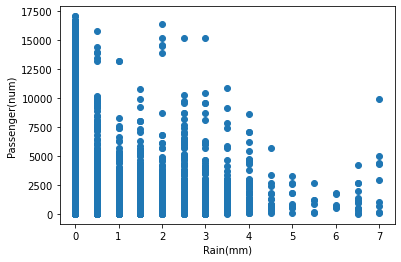

In [ ]:
plt.scatter(input_rain, passenger_num)
plt.ylabel('Passenger(num)')
plt.xlabel('Rain(mm)')
plt.show()

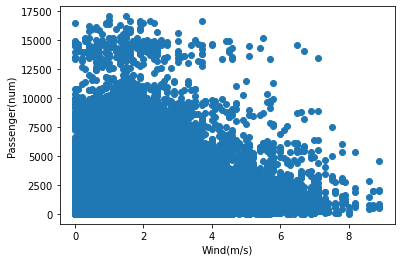

In [ ]:
plt.scatter(input_wind, passenger_num)
plt.ylabel('Passenger(num)')
plt.xlabel('Wind(m/s)')
plt.show()

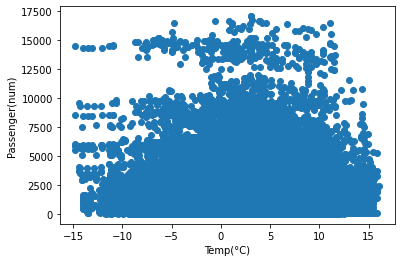

In [ ]:
plt.scatter(input_temp, passenger_num)
plt.ylabel('Passenger(num)')
plt.xlabel('Temp(°C)')
plt.show()